In [5]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import math
import matplotlib.pyplot as plt

## Códigos preparatórios

In [6]:
data = pd.read_excel('sistema2.xlsx', skiprows=39)
data.head()

Scan Sweep Time (Sec)  Scan Number           101Time (Sec)  101 (°C)  \
0 2024-09-16 08:33:44.090            1 2024-09-16 08:33:44.090    16.621   
1 2024-09-16 08:33:54.074            2 2024-09-16 08:33:54.074    16.768   
2 2024-09-16 08:34:04.074            3 2024-09-16 08:34:04.074    16.712   
3 2024-09-16 08:34:14.074            4 2024-09-16 08:34:14.074    16.699   
4 2024-09-16 08:34:24.075            5 2024-09-16 08:34:24.075    16.708   

            102Time (Sec)  102 (°C)           103Time (Sec)  103 (°C)  \
0 2024-09-16 08:33:44.129    15.590 2024-09-16 08:33:44.169    15.628   
1 2024-09-16 08:33:54.113    15.648 2024-09-16 08:33:54.153    15.647   
2 2024-09-16 08:34:04.113    15.699 2024-09-16 08:34:04.152    15.686   
3 2024-09-16 08:34:14.113    15.611 2024-09-16 08:34:14.153    15.649   
4 2024-09-16 08:34:24.114    15.619 2024-09-16 08:34:24.153    15.683   

            104Time (Sec)  104 (°C)  ...           113Time (Sec)  113 (°C)  \
0 2024-09-16 08:33:44.208    15.628  ... 2024-09-16 08:33:44.559    15.785   
1 2024-09-16 08:33:54.192    15.732  ... 2024-09-16 08:33:54.542    15.806   
2 2024-09-16 08:34:04.191    15.675  ... 2024-09-16 08:34:04.540    15.811   
3 2024-09-16 08:34:14.192    15.644  ... 2024-09-16 08:34:14.542    15.798   
4 2024-09-16 08:34:24.192    15.664  ... 2024-09-16 08:34:24.543    15.802   

            114Time (Sec)  114 (°C)           115Time (Sec)  115 (°C)  \
0 2024-09-16 08:33:44.598    16.588 2024-09-16 08:33:44.637    16.911   
1 2024-09-16 08:33:54.580    16.584 2024-09-16 08:33:54.619    16.902   
2 2024-09-16 08:34:04.579    16.603 2024-09-16 08:34:04.618    16.920   
3 2024-09-16 08:34:14.581    16.611 2024-09-16 08:34:14.620    16.923   
4 2024-09-16 08:34:24.582    16.579 2024-09-16 08:34:24.621    16.912   

            116Time (Sec)  116 (°C)           117Time (Sec)  117 (Vac)  
0 2024-09-16 08:33:44.676    16.961 2024-09-16 08:33:45.874   0.000001  
1 2024-09-16 08:33:54.658    16.866 2024-09-16 08:33:55.854   0.000000  
2 2024-09-16 08:34:04.657    16.976 2024-09-16 08:34:05.855   0.000000  
3 2024-09-16 08:34:14.658    16.995 2024-09-16 08:34:15.855   0.000000  
4 2024-09-16 08:34:24.659    16.924 2024-09-16 08:34:25.859   0.000000  

[5 rows x 36 columns]

In [7]:
data.columns

Index(['Scan Sweep Time (Sec)', 'Scan Number', '101Time (Sec)', '101 (°C)',
       '102Time (Sec)', '102 (°C)', '103Time (Sec)', '103 (°C)',
       '104Time (Sec)', '104 (°C)', '105Time (Sec)', '105 (°C)',
       '106Time (Sec)', '106 (°C)', '107Time (Sec)', '107 (°C)',
       '108Time (Sec)', '108 (°C)', '109Time (Sec)', '109 (°C)',
       '110Time (Sec)', '110 (°C)', '111Time (Sec)', '111 (°C)',
       '112Time (Sec)', '112 (°C)', '113Time (Sec)', '113 (°C)',
       '114Time (Sec)', '114 (°C)', '115Time (Sec)', '115 (°C)',
       '116Time (Sec)', '116 (°C)', '117Time (Sec)', '117 (Vac)'],
      dtype='object')

In [8]:
data_estacionaria = data.iloc[5000:8000]
data_estacionaria.head()

Scan Sweep Time (Sec)  Scan Number           101Time (Sec)  101 (°C)  \
5000 2024-09-16 22:27:04.079         5001 2024-09-16 22:27:04.079    15.832   
5001 2024-09-16 22:27:14.074         5002 2024-09-16 22:27:14.074    15.685   
5002 2024-09-16 22:27:24.077         5003 2024-09-16 22:27:24.077    15.587   
5003 2024-09-16 22:27:34.074         5004 2024-09-16 22:27:34.074    15.370   
5004 2024-09-16 22:27:44.074         5005 2024-09-16 22:27:44.074    15.375   

               102Time (Sec)  102 (°C)           103Time (Sec)  103 (°C)  \
5000 2024-09-16 22:27:04.118    31.570 2024-09-16 22:27:04.156    31.411   
5001 2024-09-16 22:27:14.113    31.478 2024-09-16 22:27:14.153    31.394   
5002 2024-09-16 22:27:24.116    31.454 2024-09-16 22:27:24.155    31.379   
5003 2024-09-16 22:27:34.113    31.592 2024-09-16 22:27:34.152    31.423   
5004 2024-09-16 22:27:44.113    31.422 2024-09-16 22:27:44.152    31.343   

               104Time (Sec)  104 (°C)  ...           113Time (Sec)  113 (°C)  \
5000 2024-09-16 22:27:04.195    31.042  ... 2024-09-16 22:27:04.546    29.764   
5001 2024-09-16 22:27:14.192    31.027  ... 2024-09-16 22:27:14.542    29.737   
5002 2024-09-16 22:27:24.194    30.996  ... 2024-09-16 22:27:24.544    29.779   
5003 2024-09-16 22:27:34.191    31.003  ... 2024-09-16 22:27:34.542    29.781   
5004 2024-09-16 22:27:44.191    30.991  ... 2024-09-16 22:27:44.541    29.793   

               114Time (Sec)  114 (°C)           115Time (Sec)  115 (°C)  \
5000 2024-09-16 22:27:04.585    22.352 2024-09-16 22:27:04.624    16.437   
5001 2024-09-16 22:27:14.581    22.338 2024-09-16 22:27:14.619    16.377   
5002 2024-09-16 22:27:24.583    22.413 2024-09-16 22:27:24.621    16.452   
5003 2024-09-16 22:27:34.580    22.452 2024-09-16 22:27:34.620    16.540   
5004 2024-09-16 22:27:44.580    22.472 2024-09-16 22:27:44.619    16.628   

               116Time (Sec)  116 (°C)           117Time (Sec)  117 (Vac)  
5000 2024-09-16 22:27:04.663    16.070 2024-09-16 22:27:05.861   8.831019  
5001 2024-09-16 22:27:14.658    16.161 2024-09-16 22:27:15.856   8.842993  
5002 2024-09-16 22:27:24.660    16.060 2024-09-16 22:27:25.859   8.837491  
5003 2024-09-16 22:27:34.659    16.174 2024-09-16 22:27:35.857   8.830479  
5004 2024-09-16 22:27:44.658    16.595 2024-09-16 22:27:45.856   8.834816  

[5 rows x 36 columns]

In [9]:
canais = [f"{x} (°C)" for x in range(101, 117)]

data_medias_distancias = pd.DataFrame()
data_medias_distancias["Chanel"] = [column for column in canais]
data_medias_distancias["T - Mean [˚C]"] = [data_estacionaria[column].mean() for column in canais]
data_medias_distancias["Distance [mm]"] = [x for x in range(0, 182-16, 15)] + [None, None, None, None]
data_medias_distancias

Chanel  T - Mean [˚C]  Distance [mm]
0   101 (°C)      15.689968            0.0
1   102 (°C)      31.394970           15.0
2   103 (°C)      31.280760           30.0
3   104 (°C)      30.917629           45.0
4   105 (°C)      30.720313           60.0
5   106 (°C)      30.637927           75.0
6   107 (°C)      30.449438           90.0
7   108 (°C)      30.281326          105.0
8   109 (°C)      30.128774          120.0
9   110 (°C)      29.958554          135.0
10  111 (°C)      29.903849          150.0
11  112 (°C)      29.745027          165.0
12  113 (°C)      29.601162            NaN
13  114 (°C)      22.237429            NaN
14  115 (°C)      16.056840            NaN
15  116 (°C)      16.060013            NaN

----

## Exercício 1:

Preencha a tabela com as informações do sistema usado pelo grupo.

### Código para EX1

In [10]:
data_filtered_ex1 = data[data['117 (Vac)'] >= 1]['117 (Vac)'].to_frame()
data_filtered_ex1.head()

117 (Vac)
427   9.381725
428   9.375964
429   8.666271
430   8.646918
431   8.648471

In [11]:
print(f"Tensão: {round(data_filtered_ex1['117 (Vac)'].mean(), 4)}")

Tensão: 8.6827


### Resolução exercício 1

Para resolver o exercício 1: 

Primeiro utilizamos a **resistência elétrica fornecida**.

Para calcular a **tensão aplicada**, fizemos a média dos valores medidos no canal 117 após as primeiras iterações (à partir do momento que ele começou a apresentar valores consideráveis).

| Informações | Valores  |
|----------------------|---|
| Nº do sistema usado:|  2 |
| Resistência elétrica:|  5,56 |
| Tensão aplicada:     | 8,68  |

----

## Exercício 2:

A Figura 2 ilustra a variação da condutividade do alumínio 2014 com a temperatura.  
Verifique a condição de **regime permanente** na aleta, observando os resultados de temperatura.  
Determine e indique em sua resposta:

**a)** A condutividade do alumínio na **temperatura de filme**, definida por:

$$
T_f = \frac{T_{\mathrm{mal}} + T_{\mathrm{mamb}}}{2}
$$

onde:

- $T_{\mathrm{mal}}$ é a **temperatura média na aleta**  
- $T_{\mathrm{mamb}}$ é a **temperatura média ambiente**

### Código para o exercício 2

In [12]:
media_medias = data_medias_distancias.iloc[1:12]["T - Mean [˚C]"].mean()

t_amb_media = data_estacionaria[['101 (°C)']].mean().mean()
t_filme = (media_medias + t_amb_media)/2
t_filme

def interpolador_lagrange(x, x_data, fofx_data):
    f_x = 0
    for i, f in enumerate(fofx_data):
        multiplier = 1.0
        for j, _ in enumerate(x_data):
            if j!=i:
                multiplier *= (x-x_data[j])/(x_data[i]-x_data[j])
        f_x += multiplier*f
    return f_x

x_data = [37.78, 51.67]
fofx_data = [155.68, 156.88]

K = interpolador_lagrange(t_filme, x_data, fofx_data)


print(f"T_mal = {media_medias:.4f} °C")
print(f"T_amb = {t_amb_media:.4f} °C")
print(f"T_filme = {t_filme:.4f} °C")
print(f"""A condutividade térmica do alumínio na temperatura do filme é...\n
K = {K:.2f} W/(m*K)""")

T_mal = 30.4926 °C
T_amb = 15.6900 °C
T_filme = 23.0913 °C
A condutividade térmica do alumínio na temperatura do filme é...

K = 154.41 W/(m*K)


### Resolução e explicação do exercício 2

Para resolver o exercício 2, calculamos a média para cada canal pertencente à aleta (dos valores estacionários), em seguida, fizemos a média das médias, para encontrar $T_{mal}$.

Para encontrar $T_{amb}$, fizemos a média dos valores estacionários do canal 101.

Após os processos, chegamos em:

- $T_{mal}$ = 30.49˚C

- $T_{amb}$ = 15.69˚C

$$
T_f = \frac{{30.49} + {15.69}}{2}
$$

Logo:

$T_f$ = 23.09˚C

Após encontrar $T_f$, devemos fazer a interpolação de lagrange para encontrar o valor da condutividade térmica do alumínio na temperatura $T_f$.

Após aplicar a fórmula descrita no código acima (interpolação de lagrange), chegamos em:

$$
K = 154.41 [ \frac{{W}}{m * K}] 
$$

----

## Exercício 3:
Gráfico 1: Apresente um gráfico da temperatura medida experimentalmente $T_{exp}$ em cada posição do
termopar. Considere que o termopar da base ocupa a posição 𝑥 = 0.

Em sua resposta:

a) Apresente o gráfico de acordo com o solicitado.

### Código para o exercício 3

In [13]:
graphic_columns_ex3 = [f"{x} (°C)" for x in range(102, 114)]

fig = go.Figure()
for column in graphic_columns_ex3:
    fig.add_trace(go.Scatter
    (
        x=data.index,
        y=data[column],
        mode='lines',
        name=column
    ))

    fig.update_layout(
        title="Temperature vs Scan Sweep Time",
        xaxis_title="Scan Sweep Time (Sec)",
        yaxis_title="Temperature (°C)",
    )

fig.show()

In [14]:
graph_ex3 = data_medias_distancias.iloc[1:12]

fig_ex3 = go.Figure()
fig_ex3.add_trace(go.Scatter
(
    x=graph_ex3["Distance [mm]"],
    y=graph_ex3["T - Mean [˚C]"],
    mode='lines+markers',
    name="Temperature vs Distance"
))
fig_ex3.update_layout(
    title="Temperature vs. Distance along the Aleta",
    xaxis_title="Distance (mm)",
    yaxis_title="Mean Temperature Exp (°C)",
    template="plotly_white"
)
fig_ex3.update_yaxes(tickmode='linear', dtick=0.1)
fig_ex3.show()

### Resolução e Explicação exercício 3
1. Utilizamos os canais de 102 a 113 pois representam desde a base da aleta até seu topo (todos os canais internos);

2. Como podemos observar no gráfico "Temperature vs Scan Sweep Time", pode ser considerado o regime permanente da iteração 5000 até a 8000. Logo, para resolver as questões utilizaremos a média desses valores medidos;

3. Para plotar o gráfico corretamente, consideramos o canal 102 como a base da aleta (x = 0). Logo, utilizando as figuras fornecidas no arquivo do projeto, tivemos de reduzir as distâncias da distância que o canal 102 estava (16mm) para encontrar a distância de cada canal do canal 102;

4. O último passo foi plotar o gráfico com o eixo x sendo a distância em milímetros dos canais 102 a 113 em relação ao canal 102 e com o eixo y sendo a média das temperaturas medidas fornecidas na base do sistema 2.


----

## Exercício 4
<p>
Gráfico 2: Apresente um gráfico da temperatura considerando o modelo analítico (T teórico) ao longo do
comprimento da aleta. Considere a posição do termopar da base como 𝑥 = 0. Em sua resposta:
</p>

<p> 
a. Indique o modelo analítico usado considerando as condições de contorno na base e na extremidade
da aleta.
</p>
<p>
b. Destaque a temperatura na posição do último termopar e na extremidade da aleta. ATENÇÃO:
Observe que o último termopar não está localizado na extremidade da aleta.
</p>
<p>
c. Com base em seus estudos e na montagem da experiência, faça uma estimativa para o parâmetro ℎ
e destaque esse resultado na resposta. Explique brevemente o raciocínio usado para a escolha.
</p>
<p>
d. Apresente o gráfico e indique o valor de 𝒉 usado na figura.
</p>

a) O modelo analítico usado para descrever a distribuição de temperatura ao longo da aleta é baseado na equação da condução de calor em regime permanente, considerando transferência de calor por convecção

Para a condição de contorno da base (x=0)

$$
T(0) = T_b
$$


Para a segunda condição de contorno, na extremidade (x=L) - Convecção, CASO A

$$ - \kappa \frac{d\theta}{dx} \Bigg|_{x=L} = h\theta(L) $$

Logo , a equação de distribuição de temperaturas é :

$$
T(x) = T_{\infty} + (T_0 - T_{\infty}) \cdot \frac{\cosh(m(L - x)) + \left(\frac{h}{m k}\right) \sinh(m(L - x))}{\cosh(mL) + \left(\frac{h}{m k}\right) \sinh(mL)}
$$

b) Destaque a temperatura na posição do último termopar e na extremidade da aleta:

In [31]:
temp_media = data_medias_distancias["T - Mean [˚C]"]
ultima_term = temp_media[11] # 11 -> Termopar 112
print(f"Temperatura no termopar 112: {ultima_term:.4f}˚C") # Último termopar
temp_media

Temperatura no termopar 112: 29.7450˚C


0     15.689968
1     31.394970
2     31.280760
3     30.917629
4     30.720313
5     30.637927
6     30.449438
7     30.281326
8     30.128774
9     29.958554
10    29.903849
11    29.745027
12    29.601162
13    22.237429
14    16.056840
15    16.060013
Name: T - Mean [˚C], dtype: float64

In [55]:
# Temperatura na extremidade da aleta

dist = data_medias_distancias.iloc[0:12]["Distance [mm]"].values

def temp(x, T1, T2, x1, x2):
    return T1 + ((T2-T1)*(x - x1))/(x2-x1)


T_L = temp(181, temp_media[0], ultima_term , dist[0], dist[-1])

print(f"Na extremidade, a temperatura é: {T_L:.2f} °C")

Na extremidade, a temperatura é: 31.11 °C


c) Com base em seus estudos e na montagem da experiência, faça uma estimativa para o parâmetro ℎ:

In [ ]:
h = 15

d) Apresente o gráfico e indique o valor de 𝒉 usado na figura

In [ ]:
graphic_ex4 = data_medias_distancias.iloc[1:13]

calor_esp = 880   
raio = 12*1e-3   
perimetro = 2*math.pi*raio  
densidade = 2794   
At = math.pi*(raio**2)   
L = 0.18

base = graphic_ex4["T - Mean [˚C]"]
t_amb_media = data["115 (°C)"].mean() # Temperatura externa/ambiente 
k = 155 # Visto no gráfico

theta_L = T_L - t_amb_media  # [°C]
theta_L

1     31.394970
2     31.280760
3     30.917629
4     30.720313
5     30.637927
6     30.449438
7     30.281326
8     30.128774
9     29.958554
10    29.903849
11    29.745027
12    29.601162
Name: T - Mean [˚C], dtype: float64

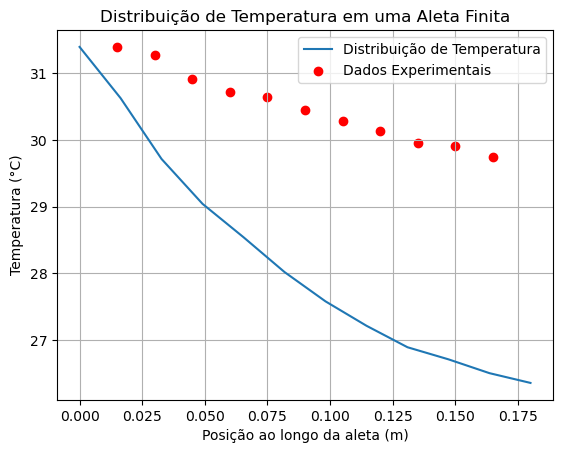

In [58]:
# Cálculo do parâmetro m
m = math.sqrt((h * perimetro) / (k * At))

# Função para a distribuição de temperatura
def T(x):
    return (np.cosh(m * (L - x)) + (h / (m * k)) * np.sinh(m * (L - x))) / \
           (np.cosh(m * L) + (h / (m * k)) * np.sinh(m * L))

# Valores de x ao longo da aleta
x_vals = np.linspace(0, L, 12)
T_vals = T(x_vals) * (base - t_amb_media) + t_amb_media

# Plotando a distribuição de temperatura
plt.plot(x_vals, T_vals, label="Distribuição de Temperatura")
plt.scatter(graphic_ex4["Distance [mm]"]/1000, graphic_ex4["T - Mean [˚C]"], color='r', label='Dados Experimentais', marker='o')
plt.xlabel("Posição ao longo da aleta (m)")
plt.ylabel("Temperatura (°C)")
plt.title("Distribuição de Temperatura em uma Aleta Finita")
plt.legend()
plt.grid()
plt.show()

Temperatura na posição do último termopar (x = 0.164 m): 31.71 °C
Temperatura na extremidade da aleta (x = 0.180 m): 31.68 °C


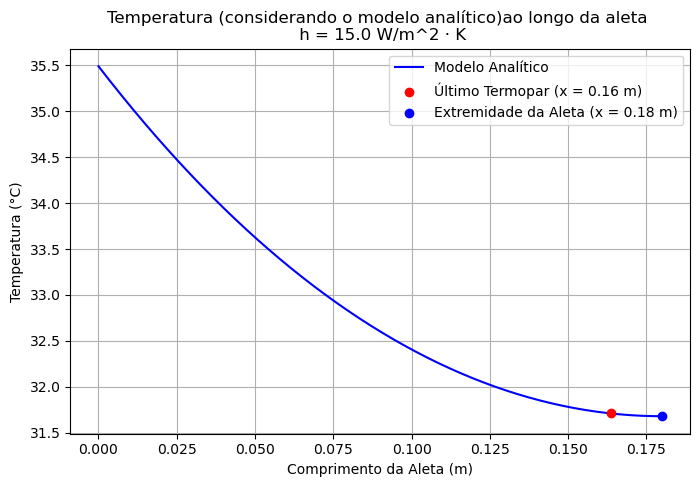

In [83]:
T_base = data["102 (°C)"].iloc[-1]

T_inf = (data["115 (°C)"].mean() + data["116 (°C)"].mean()) / 2

m = np.sqrt(h * perimetro / (k * At))
#print("m =", m, "1/m")

def T_analitico(x):
    return T_inf + (T_base - T_inf) * np.cosh(m * (L - x)) / np.cosh(m * L)

x = np.linspace(0, L, 200)
T_x = T_analitico(x)


x_last = x_vals[-2]
T_last = T_analitico(x_last)

T_tip = T_analitico(L)

print("Temperatura na posição do último termopar (x = {:.3f} m): {:.2f} °C".format(x_last, T_last))
print("Temperatura na extremidade da aleta (x = {:.3f} m): {:.2f} °C".format(L, T_tip))


plt.figure(figsize=(8, 5))
plt.plot(x, T_x, label='Modelo Analítico', color='blue')
plt.scatter([x_last], [T_last], color='red', zorder=5,
            label=f'Último Termopar (x = {x_last:.2f} m)')
plt.scatter([L], [T_tip], color='blue', zorder=5,
            label=f'Extremidade da Aleta (x = {L:.2f} m)')
plt.xlabel('Comprimento da Aleta (m)')
plt.ylabel('Temperatura (°C)')
plt.title(f'Temperatura (considerando o modelo analítico)ao longo da aleta \n h = {h} W/m^2 · K')
plt.legend()
plt.grid(True)
plt.show()


35.492